#**CROP YIELD PREDICTION**

#Dataset 1

##Reading Dataset

In [300]:
import pandas as pd
import numpy as np
df = pd.read_csv('complete_dataset.csv',na_values='=')
df

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production
0,Andaman and Nicobar Islands,NICOBARS,2007,Kharif,Other Kharif pulses,2.0,20.48349,1.971802,1013.011877,64.876363,sandy,7.182,18.354,0.000,1.0
1,Andaman and Nicobar Islands,NICOBARS,2007,Whole Year,Banana,176.0,20.48349,1.971802,1013.011877,64.876363,peaty,8.740,8.740,0.000,641.0
2,Andaman and Nicobar Islands,NICOBARS,2007,Whole Year,Cashewnut,720.0,20.48349,1.971802,1013.011877,64.876363,clay,0.615,0.615,0.615,165.0
3,Andaman and Nicobar Islands,NICOBARS,2007,Whole Year,Coconut,18168.0,20.48349,1.971802,1013.011877,64.876363,chalky,38.250,38.250,38.250,65100000.0
4,Andaman and Nicobar Islands,NICOBARS,2007,Whole Year,Sugarcane,1.0,20.48349,1.971802,1013.011877,64.876363,peaty,4.530,11.778,11.778,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245999,West Bengal,PURULIA,2021,Rabi,Urad,220.0,20.48349,1.971802,1013.011877,64.876363,clay,4.531,4.531,0.000,113.0
246000,West Bengal,PURULIA,2021,Summer,Maize,325.0,20.48349,1.971802,1013.011877,64.876363,silt,916.136,0.000,0.000,2039.0
246001,West Bengal,PURULIA,2021,Summer,Rice,306.0,20.48349,1.971802,1013.011877,64.876363,sandy,9.630,24.610,0.000,801.0
246002,West Bengal,PURULIA,2021,Summer,Sesamum,627.0,20.48349,1.971802,1013.011877,64.876363,loamy,56.070,0.000,0.000,463.0


In [301]:
df['crop_names'].unique()

array(['Other Kharif pulses', 'Banana', 'Cashewnut', 'Coconut ',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Rice', 'Black pepper',
       'Dry chillies', 'Dry ginger', 'Arecanut', 'other oilseeds',
       'Turmeric', 'Maize', 'Moong(Green Gram)', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Urad', 'Bajra', 'Castor seed', 'Horse-gram', 'Jowar',
       'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Cotton(lint)',
       'Masoor', 'Sesamum', 'Linseed', 'Safflower', 'Onion',
       'other misc. pulses', 'Samai', 'Small millets', 'Coriander',
       'Potato', 'Other  Rabi pulses', 'Soyabean',
       'Beans & Mutter(Vegetable)', 'Bhindi', 'Brinjal', 'Citrus Fruit',
       'Cucumber', 'Grapes', 'Mango', 'Orange', 'other fibres',
       'Other Fresh Fruits', 'Other Vegetables', 'Papaya', 'Pome Fruit',
       'Tomato', 'Rapeseed &Mustard', 'Mesta', 'Cowpea(Lobia)', 'Lemon',
       'Pome Granet', 'Sapota', 'Cabbage', 'Peas  (vegetable)',
       'Niger seed', 'Bottle Gourd', 'Sannhamp', 'Va

In [303]:

df['Yield'] = df['production']/df['area']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246004 entries, 0 to 246003
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   state_names     246004 non-null  object 
 1   district_names  246004 non-null  object 
 2   crop_year       246004 non-null  int64  
 3   season_names    246004 non-null  object 
 4   crop_names      246004 non-null  object 
 5   area            246004 non-null  float64
 6   temperature     246004 non-null  float64
 7   wind_speed      246004 non-null  float64
 8   precipitation   246004 non-null  float64
 9   humidity        246004 non-null  float64
 10  soil_type       246004 non-null  object 
 11  N               246004 non-null  float64
 12  P               246004 non-null  float64
 13  K               246004 non-null  float64
 14  production      242277 non-null  float64
 15  Yield           242277 non-null  float64
dtypes: float64(10), int64(1), object(5)
memory usage: 30.0+ 

In [304]:
data = {'Andaman and Nicobar Islands': 0,
 'Andhra Pradesh': 1,
 'Arunachal Pradesh': 2,
 'Assam': 3,
 'Bihar': 4,
 'Chandigarh': 5,
 'Chhattisgarh': 6,
 'Dadra and Nagar Haveli': 7,
 'Goa': 8,
 'Gujarat': 9,
 'Haryana': 10,
 'Himachal Pradesh': 11,
 'Jammu and Kashmir ': 12,
 'Jharkhand': 13,
 'Karnataka': 14,
 'Kerala': 15,
 'Madhya Pradesh': 16,
 'Maharashtra': 17,
 'Manipur': 18,
 'Meghalaya': 19,
 'Mizoram': 20,
 'Nagaland': 21,
 'Odisha': 22,
 'Puducherry': 23,
 'Punjab': 24,
 'Rajasthan': 25,
 'Sikkim': 26,
 'Tamil Nadu': 27,
 'Telangana ': 28,
 'Tripura': 29,
 'Uttar Pradesh': 30,
 'Uttarakhand': 31,
 'West Bengal': 32
}
data2 = {'Arecanut':1, 'Other Kharif pulses':2, 'Rice':3, 'Banana':4, 'Cashewnut':5,
       'Coconut ':6, 'Dry ginger':7, 'Sugarcane':8, 'Sweet potato':9, 'Tapioca':10,
       'Black pepper':11, 'Dry chillies':12, 'other oilseeds':13, 'Turmeric':14,
       'Maize':15, 'Moong(Green Gram)':16, 'Urad':17, 'Arhar/Tur':18, 'Groundnut':19,
       'Sunflower':20, 'Bajra':21, 'Castor seed':22, 'Cotton(lint)':23, 'Horse-gram':24,
       'Jowar':25, 'Korra':26, 'Ragi':27, 'Tobacco':28, 'Gram':29, 'Wheat':30, 'Masoor':31,
       'Sesamum':32, 'Linseed':33, 'Safflower':34, 'Onion':35, 'other misc. pulses':36,
       'Samai':37, 'Small millets':38, 'Coriander':39, 'Potato':40,
       'Other  Rabi pulses':41, 'Soyabean':42, 'Beans & Mutter(Vegetable)':43,
       'Bhindi':44, 'Brinjal':45, 'Citrus Fruit':46, 'Cucumber':47, 'Grapes':48, 'Mango':49,
       'Orange':50, 'other fibres':51, 'Other Fresh Fruits':52, 'Other Vegetables':53,
       'Papaya':54, 'Pome Fruit':55, 'Tomato':56, 'Rapeseed &Mustard':57, 'Mesta':58,
       'Cowpea(Lobia)':59, 'Lemon':60, 'Pome Granet':61, 'Sapota':62, 'Cabbage':63,
       'Peas  (vegetable)':64, 'Niger seed':65, 'Bottle Gourd':66, 'Sannhamp':67,
       'Varagu':68, 'Garlic':69, 'Ginger':70, 'Oilseeds total':71, 'Pulses total':72,
       'Jute':73, 'Peas & beans (Pulses)':74, 'Blackgram':75, 'Paddy':76, 'Pineapple':77,
       'Barley':78, 'Khesari':79, 'Guar seed':80, 'Moth':81,
       'Other Cereals & Millets':82, 'Cond-spcs other':83, 'Turnip':84, 'Carrot':85,
       'Redish':86, 'Arcanut (Processed)':87, 'Atcanut (Raw)':88,
       'Cashewnut Processed':89, 'Cashewnut Raw':90, 'Cardamom':91, 'Rubber':92,
       'Bitter Gourd':93, 'Drum Stick':94, 'Jack Fruit':95, 'Snak Guard':96,
       'Pump Kin':97, 'Tea':98, 'Coffee':99, 'Cauliflower':100, 'Other Citrus Fruit':101,
       'Water Melon':102, 'Total foodgrain':103, 'Kapas':104, 'Colocosia':105, 'Lentil':106,
       'Bean':107, 'Jobster':108, 'Perilla':109, 'Rajmash Kholar':110,
       'Ricebean (nagadal)':111, 'Ash Gourd':112, 'Beet Root':113, 'Lab-Lab':114,
       'Ribed Guard':115, 'Yam':116, 'Apple':117, 'Peach':118, 'Pear':119, 'Plums':120, 'Litchi':121,
       'Ber':122, 'Other Dry Fruit':123, 'Jute & mesta':124}
data3 = {'Kharif     ':1, 'Whole Year ':2, 'Autumn     ':3, 'Rabi       ':4,
       'Summer     ':5, 'Winter     ':6}
data4 = {'clay':1, 'sandy':2, 'peaty':3, 'chalky':4, 'silt':5, 'silty':6, 'loamy':7}
print(data3)

df["State"] = df["state_names"].replace(data)
df["Crop_Names"] = df["crop_names"].replace(data2)
df["Season_Name"] = df["season_names"].replace(data3)
df["Soil_Type"] = df["soil_type"].replace(data4)
df = df.drop(['state_names','district_names','crop_names','soil_type','season_names','area','production'],axis=1)
df

{'Kharif     ': 1, 'Whole Year ': 2, 'Autumn     ': 3, 'Rabi       ': 4, 'Summer     ': 5, 'Winter     ': 6}


,crop_year,temperature,wind_speed,precipitation,humidity,N,P,K,Yield,State,Crop_Names,Season_Name,Soil_Type
0,2007,20.48349,1.971802,1013.011877,64.876363,7.182,18.354,0.000,0.500000,0,2,1,2
1,2007,20.48349,1.971802,1013.011877,64.876363,8.740,8.740,0.000,3.642045,0,4,2,3
2,2007,20.48349,1.971802,1013.011877,64.876363,0.615,0.615,0.615,0.229167,0,5,2,1
3,2007,20.48349,1.971802,1013.011877,64.876363,38.250,38.250,38.250,3583.223250,0,6,2,4
4,2007,20.48349,1.971802,1013.011877,64.876363,4.530,11.778,11.778,2.000000,0,8,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245999,2021,20.48349,1.971802,1013.011877,64.876363,4.531,4.531,0.000,0.513636,32,17,4,1
246000,2021,20.48349,1.971802,1013.011877,64.876363,916.136,0.000,0.000,6.273846,32,15,5,5
246001,2021,20.48349,1.971802,1013.011877,64.876363,9.630,24.610,0.000,2.617647,32,3,5,2
246002,2021,20.48349,1.971802,1013.011877,64.876363,56.070,0.000,0.000,0.738437,32,32,5,7


In [305]:
#df=df.drop('Yield', axis = 1)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246004 entries, 0 to 246003
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   crop_year      246004 non-null  int64  
 1   temperature    246004 non-null  float64
 2   wind_speed     246004 non-null  float64
 3   precipitation  246004 non-null  float64
 4   humidity       246004 non-null  float64
 5   N              246004 non-null  float64
 6   P              246004 non-null  float64
 7   K              246004 non-null  float64
 8   Yield          242277 non-null  float64
 9   State          246004 non-null  int64  
 10  Crop_Names     246004 non-null  int64  
 11  Season_Name    246004 non-null  int64  
 12  Soil_Type      246004 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 24.4 MB


In [307]:
df.columns


Index(['crop_year', 'temperature', 'wind_speed', 'precipitation', 'humidity',
       'N', 'P', 'K', 'Yield', 'State', 'Crop_Names', 'Season_Name',
       'Soil_Type'],
      dtype='object')

##Reducing Data to One State for Ease

In [308]:
df = df[df['State'] == 17]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12628 entries, 125132 to 137759
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   crop_year      12628 non-null  int64  
 1   temperature    12628 non-null  float64
 2   wind_speed     12628 non-null  float64
 3   precipitation  12628 non-null  float64
 4   humidity       12628 non-null  float64
 5   N              12628 non-null  float64
 6   P              12628 non-null  float64
 7   K              12628 non-null  float64
 8   Yield          12496 non-null  float64
 9   State          12628 non-null  int64  
 10  Crop_Names     12628 non-null  int64  
 11  Season_Name    12628 non-null  int64  
 12  Soil_Type      12628 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 1.3 MB


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12628 entries, 125132 to 137759
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   crop_year      12628 non-null  int64  
 1   temperature    12628 non-null  float64
 2   wind_speed     12628 non-null  float64
 3   precipitation  12628 non-null  float64
 4   humidity       12628 non-null  float64
 5   N              12628 non-null  float64
 6   P              12628 non-null  float64
 7   K              12628 non-null  float64
 8   Yield          12496 non-null  float64
 9   State          12628 non-null  int64  
 10  Crop_Names     12628 non-null  int64  
 11  Season_Name    12628 non-null  int64  
 12  Soil_Type      12628 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 1.3 MB


In [310]:
df.isnull().sum()

crop_year          0
temperature        0
wind_speed         0
precipitation      0
humidity           0
N                  0
P                  0
K                  0
Yield            132
State              0
Crop_Names         0
Season_Name        0
Soil_Type          0
dtype: int64

In [311]:
df.head(6)

,crop_year,temperature,wind_speed,precipitation,humidity,N,P,K,Yield,State,Crop_Names,Season_Name,Soil_Type
125132,2004,20.48349,1.971802,1013.011877,64.876363,56.07,0.000,0.000,1113.000000,17,15,3,7
125133,2004,20.48349,1.971802,1013.011877,64.876363,9.00,9.000,0.000,0.357955,17,18,1,2
125134,2004,20.48349,1.971802,1013.011877,64.876363,0.00,0.000,0.000,0.557461,17,21,1,1
125135,2004,20.48349,1.971802,1013.011877,64.876363,38.25,38.250,38.250,0.455882,17,29,1,4
125136,2004,20.48349,1.971802,1013.011877,64.876363,0.00,23.184,0.000,1.222222,17,25,1,1
125137,2004,20.48349,1.971802,1013.011877,64.876363,5.64,14.664,14.664,1.068182,17,15,1,2


###Making Yield Column

In [312]:
df

,crop_year,temperature,wind_speed,precipitation,humidity,N,P,K,Yield,State,Crop_Names,Season_Name,Soil_Type
125132,2004,20.48349,1.971802,1013.011877,64.876363,56.070,0.000,0.000,1113.000000,17,15,3,7
125133,2004,20.48349,1.971802,1013.011877,64.876363,9.000,9.000,0.000,0.357955,17,18,1,2
125134,2004,20.48349,1.971802,1013.011877,64.876363,0.000,0.000,0.000,0.557461,17,21,1,1
125135,2004,20.48349,1.971802,1013.011877,64.876363,38.250,38.250,38.250,0.455882,17,29,1,4
125136,2004,20.48349,1.971802,1013.011877,64.876363,0.000,23.184,0.000,1.222222,17,25,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137755,2021,20.48349,1.971802,1013.011877,64.876363,7.840,7.840,0.000,0.825000,17,25,4,6
137756,2021,20.48349,1.971802,1013.011877,64.876363,7.504,18.760,7.504,0.153846,17,15,4,5
137757,2021,20.48349,1.971802,1013.011877,64.876363,0.000,0.000,0.000,0.920962,17,30,4,2
137758,2021,20.48349,1.971802,1013.011877,64.876363,2.896,3.620,0.000,1.223404,17,19,5,4


##Corelation Heatmap

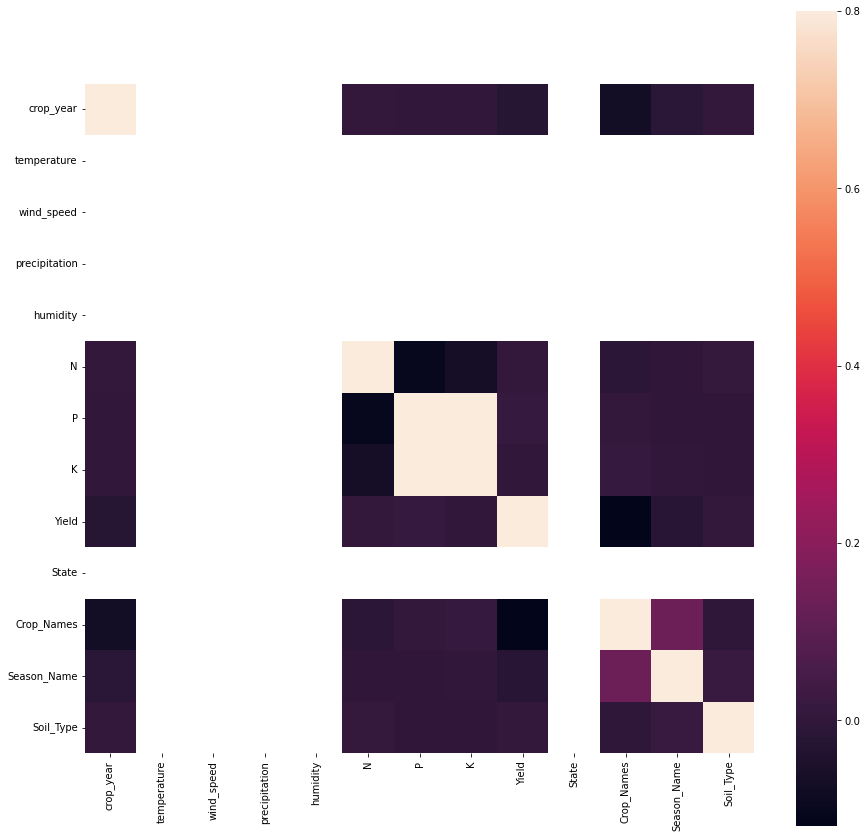

In [313]:
import matplotlib.pyplot as plt
import seaborn as sb

C_mat = df.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

##Taking Data only after 2011 because the data after 2011 is affecting the rersult alot

In [314]:
df = df[df['crop_year']>=2011]
df

,crop_year,temperature,wind_speed,precipitation,humidity,N,P,K,Yield,State,Crop_Names,Season_Name,Soil_Type
125344,2011,20.48349,1.971802,1013.011877,64.876363,10.500,27.300,27.300,0.393443,17,18,1,3
125345,2011,20.48349,1.971802,1013.011877,64.876363,39.720,105.920,52.960,0.596258,17,21,1,6
125346,2011,20.48349,1.971802,1013.011877,64.876363,8.008,8.008,0.000,0.735849,17,19,1,3
125347,2011,20.48349,1.971802,1013.011877,64.876363,5.824,14.560,5.824,1.000000,17,25,1,2
125348,2011,20.48349,1.971802,1013.011877,64.876363,0.000,0.000,0.000,1.228070,17,15,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137755,2021,20.48349,1.971802,1013.011877,64.876363,7.840,7.840,0.000,0.825000,17,25,4,6
137756,2021,20.48349,1.971802,1013.011877,64.876363,7.504,18.760,7.504,0.153846,17,15,4,5
137757,2021,20.48349,1.971802,1013.011877,64.876363,0.000,0.000,0.000,0.920962,17,30,4,2
137758,2021,20.48349,1.971802,1013.011877,64.876363,2.896,3.620,0.000,1.223404,17,19,5,4


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7255 entries, 125344 to 137759
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   crop_year      7255 non-null   int64  
 1   temperature    7255 non-null   float64
 2   wind_speed     7255 non-null   float64
 3   precipitation  7255 non-null   float64
 4   humidity       7255 non-null   float64
 5   N              7255 non-null   float64
 6   P              7255 non-null   float64
 7   K              7255 non-null   float64
 8   Yield          7143 non-null   float64
 9   State          7255 non-null   int64  
 10  Crop_Names     7255 non-null   int64  
 11  Season_Name    7255 non-null   int64  
 12  Soil_Type      7255 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 793.5 KB


### Filling Empty Values With Mean

In [317]:
df = df.fillna(df.mean())

##Train and Test Split

In [318]:
from sklearn.model_selection import train_test_split

In [319]:
a=df

In [320]:
b = df['Yield']
#a = df.drop('Yield', axis = 1)



In [325]:
a=df.drop('Yield', axis = 1)

In [326]:
len(a.columns)

12

In [327]:
a.columns

Index(['crop_year', 'temperature', 'wind_speed', 'precipitation', 'humidity',
       'N', 'P', 'K', 'State', 'Crop_Names', 'Season_Name', 'Soil_Type'],
      dtype='object')

In [328]:
features_list=['State', 'Crop_Names', 'Season_Name', 'temperature', 'wind_speed', 'precipitation', 'humidity',
       'N', 'P', 'K',  'Soil_Type']

In [329]:
features_list123=[0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
len(features_list123)

11

In [330]:
len(features_list)

11

In [331]:
a=df[features_list]

In [332]:
a.head()

,State,Crop_Names,Season_Name,temperature,wind_speed,precipitation,humidity,N,P,K,Soil_Type
125344,17,18,1,20.48349,1.971802,1013.011877,64.876363,10.500,27.300,27.300,3
125345,17,21,1,20.48349,1.971802,1013.011877,64.876363,39.720,105.920,52.960,6
125346,17,19,1,20.48349,1.971802,1013.011877,64.876363,8.008,8.008,0.000,3
125347,17,25,1,20.48349,1.971802,1013.011877,64.876363,5.824,14.560,5.824,2
125348,17,15,1,20.48349,1.971802,1013.011877,64.876363,0.000,0.000,0.000,6


In [333]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3, random_state = 42)

#print(a_train)
print(a_test)
#print(b_train)
#print(b_test)

        State  Crop_Names  Season_Name  temperature  wind_speed  \
130361     17          65            1     20.48349    1.971802   
128199     17          18            1     20.48349    1.971802   
132069     17          19            1     20.48349    1.971802   
136280     17          20            5     20.48349    1.971802   
136950     17          16            1     20.48349    1.971802   
...       ...         ...          ...          ...         ...   
130401     17          23            1     20.48349    1.971802   
128977     17          42            1     20.48349    1.971802   
127526     17          19            5     20.48349    1.971802   
137346     17          29            4     20.48349    1.971802   
134607     17          18            1     20.48349    1.971802   

        precipitation   humidity       N       P      K  Soil_Type  
130361    1013.011877  64.876363   1.500   0.000   0.00          4  
128199    1013.011877  64.876363   5.980   5.980   0.00  

In [334]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [335]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)

###Random Forest Regressor

In [337]:
   from sklearn.ensemble import RandomForestRegressor
   regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
   regr.fit(a_train, b_train)
   b_pred = regr.predict(a_test)

   from sklearn.metrics import mean_squared_error as mse
   from sklearn.metrics import mean_absolute_error as mae
   from sklearn.metrics import r2_score

   print('MSE =', mse(b_pred, b_test))
   print('MAE =', mae(b_pred, b_test))
   print('R2 Score =', r2_score(b_pred, b_test))
b_pred


MSE = 10.624483946419359
MAE = 0.9726876500999516
R2 Score = 0.9449145863016928


array([0.83374307, 0.83374307, 0.83374307, ..., 0.83374307, 0.83374307,
       0.83374307])

###Polynomial Support Vector Machine

In [339]:
from sklearn.svm import SVR
regressorpoly=SVR(kernel='poly',epsilon=1.0)
regressorpoly.fit(a_train,b_train)
pred=regressorpoly.predict(a_test)
print(regressorpoly.score(a_test,b_test))
print(r2_score(b_test,b_pred))


-0.025283444597673954
0.9444491326739392


###XGBRegressor

In [340]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error 
XGBModel = XGBRegressor()
XGBModel.fit(a_train,b_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(a_test)
MAE = mean_absolute_error(b_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)
XGBpredictions


XGBoost validation MAE =  1.0249226639614595


array([0.46251205, 0.38124034, 1.1038871 , ..., 1.5699909 , 0.673583  ,
       0.6734228 ], dtype=float32)

In [341]:

print(r2_score(b_test , XGBpredictions))

0.9155554911369197


In [343]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'xgboost_yield_prediction_final.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(XGBpredictions, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

In [345]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(XGBModel, 'xgboost_yield_prediction_final.pkl')
 
# Load the model from the file
knn_from_joblib = joblib.load('xgboost_yield_prediction_final.pkl')
 
# Use the loaded model to make predictions


##Neural Network Implementation

In [346]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from tensorflow.keras.callbacks import History 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [347]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = a_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])
NN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1536      
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 dense_18 (Dense)            (None, 256)               65792     
                                                                 
 dense_19 (Dense)            (None, 1)                 257       
                                                                 
Total params: 166,401
Trainable params: 166,401
Non-trainable params: 0
_________________________________________________________________


In [348]:
from tensorflow.keras.callbacks import History 
history = History()
History=NN_model.fit(a_train, b_train, epochs=50, batch_size=500, validation_split = 0.2, callbacks=[history])

Epoch 1/50
9/9 [==============================] - 0s 20ms/step - loss: 3.7259 - accuracy: 0.0135 - mean_absolute_error: 3.7259 - val_loss: 3.2996 - val_accuracy: 0.0581 - val_mean_absolute_error: 3.2996
Epoch 2/50
9/9 [==============================] - 0s 8ms/step - loss: 3.5047 - accuracy: 0.0593 - mean_absolute_error: 3.5047 - val_loss: 3.2414 - val_accuracy: 0.0492 - val_mean_absolute_error: 3.2414
Epoch 3/50
9/9 [==============================] - 0s 8ms/step - loss: 3.4614 - accuracy: 0.0500 - mean_absolute_error: 3.4614 - val_loss: 3.2139 - val_accuracy: 0.0581 - val_mean_absolute_error: 3.2139
Epoch 4/50
9/9 [==============================] - 0s 8ms/step - loss: 3.4493 - accuracy: 0.0544 - mean_absolute_error: 3.4493 - val_loss: 3.2044 - val_accuracy: 0.0522 - val_mean_absolute_error: 3.2044
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 3.4415 - accuracy: 0.0527 - mean_absolute_error: 3.4415 - val_loss: 3.1951 - val_accuracy: 0.0522 - val_mean_absolute_err

9/9 [==============================] - 0s 8ms/step - loss: 1.9573 - accuracy: 0.0515 - mean_absolute_error: 1.9573 - val_loss: 1.7490 - val_accuracy: 0.0522 - val_mean_absolute_error: 1.7490
Epoch 42/50
9/9 [==============================] - 0s 8ms/step - loss: 1.9721 - accuracy: 0.0527 - mean_absolute_error: 1.9721 - val_loss: 1.6682 - val_accuracy: 0.0492 - val_mean_absolute_error: 1.6682
Epoch 43/50
9/9 [==============================] - 0s 8ms/step - loss: 1.9673 - accuracy: 0.0527 - mean_absolute_error: 1.9673 - val_loss: 1.6294 - val_accuracy: 0.0512 - val_mean_absolute_error: 1.6294
Epoch 44/50
9/9 [==============================] - 0s 8ms/step - loss: 1.9566 - accuracy: 0.0510 - mean_absolute_error: 1.9566 - val_loss: 1.6485 - val_accuracy: 0.0512 - val_mean_absolute_error: 1.6485
Epoch 45/50
9/9 [==============================] - 0s 8ms/step - loss: 1.9306 - accuracy: 0.0517 - mean_absolute_error: 1.9306 - val_loss: 1.7149 - val_accuracy: 0.0492 - val_mean_absolute_error: 1.71

dict_keys(['loss', 'accuracy', 'mean_absolute_error', 'val_loss', 'val_accuracy', 'val_mean_absolute_error'])


Text(0.5, 0, 'epoch')

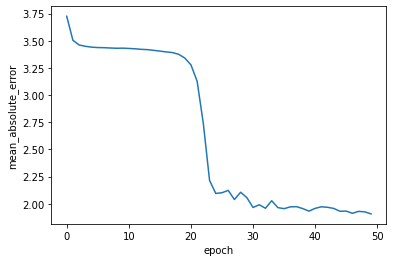

In [349]:
print(history.history.keys())
plt.plot(History.history['mean_absolute_error'])
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')

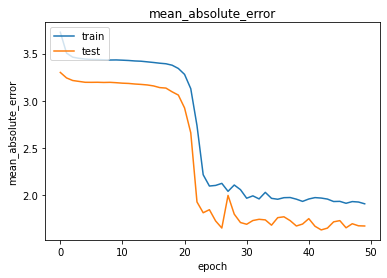

In [350]:
plt.plot(History.history['mean_absolute_error'])
plt.plot(History.history['val_mean_absolute_error'])
plt.title('mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [351]:

    
features_list=['crop_year', 'temperature', 'wind_speed', 'precipitation', 'humidity',
       'N', 'P', 'K', 'State', 'Crop_Names', 'Season_Name', 'Soil_Type' ]

In [352]:
print(features_list.index('State'))

8


In [353]:
features_list[11]

'Soil_Type'